In [8]:
#  Created by SHIRISH KISHORE KUMAR & SOORYA
#  Created on 04/10/2023
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import cv2

#Defining the transform
transform = transforms.Compose([transforms.ToTensor()])
#Reference:
#https://nextjournal.com/gkoehler/pytorch-mnist
state_dict = torch.load('/Users/shirish/trained model/model.pth')
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Reference:
        #https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
        self.mnist_net =nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(10, 20, kernel_size=5),
        nn.Dropout2d(p=0.5),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(320, 50),
        nn.ReLU(),
        nn.Linear(50, 10),
        )
    #Definign the forward pass
    def forward(self, x):
        x = self.mnist_net(x)
        return F.log_softmax(x)
#Creating the model
model = Net()
#Loading the state dict
model.load_state_dict(state_dict)
#Printing the model
print(model)


Net(
  (mnist_net): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout2d(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=320, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=10, bias=True)
  )
)


torch.Size([10, 1, 5, 5])
Filter 1
[[ 0.03472518  0.01124013 -0.00469662  0.15362175  0.21928568]
 [ 0.0996647   0.49821374  0.37198848  0.30603734  0.19414051]
 [ 0.2505096   0.14894116  0.22651133  0.07526287  0.00782622]
 [-0.13315193 -0.28327435 -0.2532577  -0.27947462  0.03405384]
 [-0.41104227 -0.40527102 -0.40147945 -0.34183672 -0.11986975]]
Filter 2
[[-0.32634345  0.02118316 -0.2898769   0.07836542  0.10722324]
 [-0.16703992  0.07788645  0.02711583  0.24640393  0.1881506 ]
 [-0.10339779  0.02430805 -0.10827802  0.17058957  0.31764382]
 [ 0.07519466 -0.16427377 -0.03742868  0.04859957  0.271443  ]
 [-0.27100116 -0.336745   -0.25777295 -0.21647379  0.29056153]]
Filter 3
[[ 0.22272997  0.23823833  0.18746522  0.10504019  0.29531902]
 [-0.10119015  0.04643345 -0.12585895 -0.00650491 -0.08537879]
 [ 0.02404448 -0.0493151   0.13117804 -0.21086724 -0.16450708]
 [-0.14194353  0.16029905  0.08557826  0.21957347 -0.11422151]
 [-0.2217759  -0.22189438 -0.14880505  0.10018204  0.12112013]]

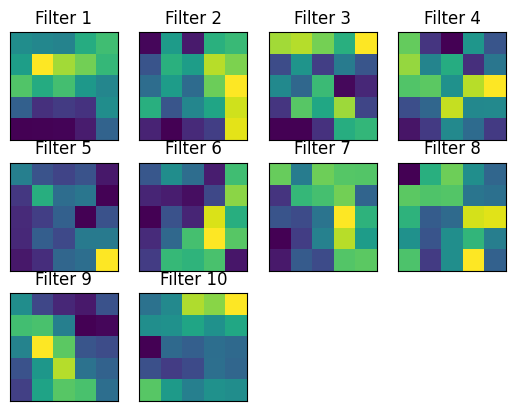

In [9]:
#Loadding the pretrained model
state_dict = torch.load('/Users/shirish/trained model/model.pth')
model = Net()
#Loading the state dict
model.load_state_dict(state_dict)
#Getting the weights
weights = model.mnist_net[0].weight
#Printing the shape of the weights
print(weights.shape)
#Printing and plotting the weights of the filters
for i in range(weights.shape[0]):
    filter_name = 'Filter ' + str(i+1)
    print(filter_name)
    print(weights[i, 0].detach().numpy())
    plt.subplot(3, 4, i+1)
    plt.imshow(weights[i, 0].detach().numpy())
    plt.xticks([])
    plt.yticks([])
    plt.title(filter_name)
    
plt.show()


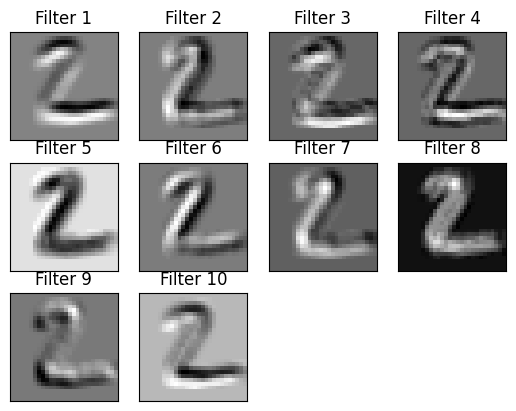

In [10]:
#Loading the pretrained model
state_dict = torch.load('/Users/shirish/trained model/model.pth')
#Creating the model
model = Net()
#Loading the state dict
model.load_state_dict(state_dict)
#Getting the weights
weights = model.mnist_net[0].weight
#Loading the MNIST dataset
test_set = datasets.MNIST(root='./tmp/', train=False, download=True, transform=None)
#Getting the first image
image = test_set[1][0]
#Converting the image to a numpy array
image = np.array(image)
#Reshaping the image
image_tensor = torch.tensor(image).unsqueeze(0).unsqueeze(0).float()
#apply the filters to the image
with torch.no_grad():
    for i in range(weights.shape[0]):
        #getting the ith filter
        filter = weights[i, 0]
        #apply the filter to the image
        filtered_image = F.conv2d(image_tensor, filter.unsqueeze(0).unsqueeze(0), stride=1, padding=2)
        #Converting the filtered image to a numpy array
        filtered_image = filtered_image.squeeze().detach().numpy()
        #Plotting the filtered image
        plt.subplot(3, 4, i+1)
        plt.imshow(filtered_image, cmap='gray')
        plt.xticks([])
        plt.yticks([])

        #Adding the title
        plt.title('Filter {}'.format(i+1))

plt.show()
